In [1]:
import os
os.chdir('D://scratch_backup//alpine//beri9208//mnc-pt-pyrid//calcs//surfs//0n//No_bias//')
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
surf_name = '0N, No_bias'
save_name = '0n_nb'
save_dir = 'C://Users//User//PycharmProjects//Musgrave_scripts//BenRich//charge_analysis//'
plane_idx = 0

In [2]:
import funcs
R, S, mu = funcs.get_output_shape('out')
d_tot = np.fromfile('d_tot')
d_tot = np.reshape(d_tot, S)
a_tuple, da_tuple = funcs.init_box_xyz_coords(R, S)
plot_slice = np.zeros(np.shape(d_tot[:,:,0]))
intg_z_bounds = (plane_idx, plane_idx + int(S[2]/8))
for i in range(intg_z_bounds[0], intg_z_bounds[1]):
    plot_slice += d_tot[:,:,i]
plot_slice *= da_tuple[2]

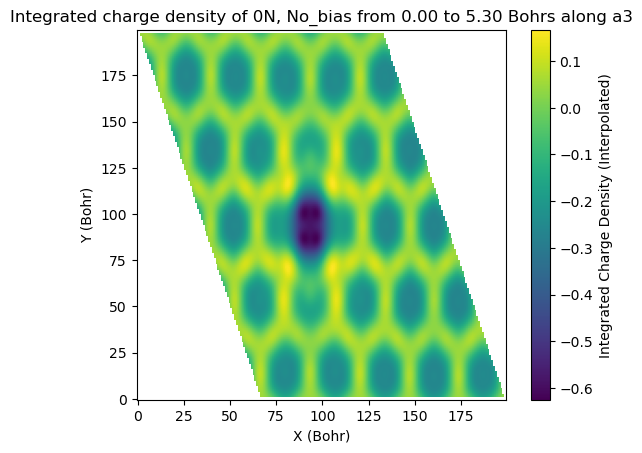

In [3]:
# Generate sample data (replace this with your 2D array and associated x/y values)
num_points = 100
x, y, z = funcs.conv_to_cartesian(plot_slice, R, S)

# Create a regular x/y grid
grid_x, grid_y = np.mgrid[min(x):max(x):200j, min(y):max(y):200j]

# Interpolate data onto the regular grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# # Plot the original data as scatter points
# plt.scatter(x, y, c=z, marker='o', cmap='viridis', edgecolors='k')
# plt.colorbar(label='Integrated Charge Density')

# Plot the interpolated data as a 2D heatmap
plt.figure()
plt.imshow(grid_z.T, origin='lower', cmap='viridis')
#plt.imshow(grid_z.T, origin='lower', cmap='viridis', extent=[0, 1, 0, 1])
plt.colorbar(label='Integrated Charge Density (Interpolated)')

# Set axis labels and title
plt.xlabel('X (Bohr)')
plt.ylabel('Y (Bohr)')
lb = intg_z_bounds[0]*da_tuple[2]
ub = intg_z_bounds[1]*da_tuple[2]
lb = format(lb, f".{2}f")
ub = format(ub, f".{2}f")
plt.title('Integrated charge density of ' + surf_name + ' from ' + lb + ' to ' + ub +  ' Bohrs along a3')
plt.savefig(save_dir + save_name + '.png')

# Display the plots
plt.show()

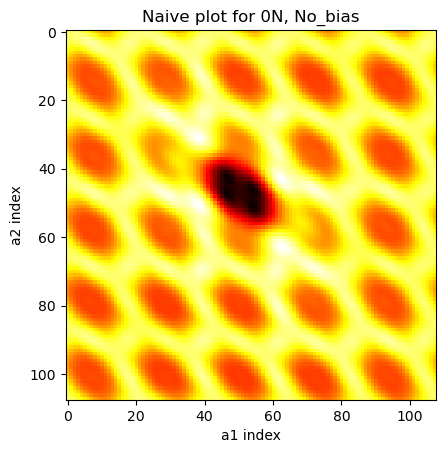

In [4]:
plt.imshow(plot_slice, cmap='hot', interpolation='nearest')
plt.xlabel('a1 index')
plt.ylabel('a2 index')
plt.title('Naive plot for ' + surf_name)
plt.savefig(save_dir + save_name + '_direct.png')
plt.show()

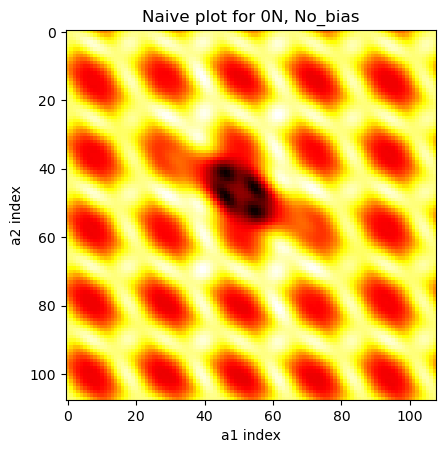

In [5]:
plt.show()
plt.imshow(d_tot[:,:,0], cmap='hot', interpolation='nearest')
plt.xlabel('a1 index')
plt.ylabel('a2 index')
plt.title('Naive plot for ' + surf_name)
#plt.savefig(save_dir + save_name + '_direct.png')
plt.show()

In [6]:
S

array([108, 108, 196])